In [793]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [799]:
def seq_generator():
    #A to G // -1 to 5
    seq = list()
    index = 2
    reward = 0
    while index>-1 and index < 5:
        seq.append(index)
        index_n = index + random.choice((-1,1))
        if index_n == -1:
            seq.append(index_n)
            break
        elif index_n == 5:
            seq.append(index_n)
            reward = 1
            break
        index = index_n
    return seq, reward  

In [800]:
def training_sets_generator(no_training_sets = 100, no_sequences = 10):
    seq = [[None for j in range(no_sequences)] for i in range(no_training_sets)]
    reward = [[None for j in range(no_sequences)] for i in range(no_training_sets)]
    for i in range(no_training_sets):
        for j in range(no_sequences):
            seq[i][j], reward[i][j] = seq_generator()
    return seq, reward

In [818]:
def training_rep(seq,reward,no_training_sets = 100, no_sequences = 10, lam = 1):
    alpha = 0.1
    epi = 0.01
    x= np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
    int_w = np.array([0.5,0.5,0.5,0.5,0.5])
    mse = 0
    for nt in range(no_training_sets):
        w = int_w
        diff = np.array([1,1,1,1,1])
        while np.linalg.norm(diff)  > epi:
            w_old = w
            for ns in range(no_sequences):
                e = 0
                re = reward[nt][ns]
                dw = np.array([0.,0.,0.,0.,0.])
                for ite in range(len(seq[nt][ns])):
                    state = seq[nt][ns][ite]
                    state_new = seq[nt][ns][ite+1]
                    e = lam*e + x[state]
                    if len(seq[nt][ns])-ite==2:
                        dw += alpha*(re-np.dot(w,x[state]))*e 
                        break
                    else:
                        dw += alpha*(np.dot(w,x[state_new])-np.dot(w,x[state]))*e
                w = w + dw
            diff = w-w_old             
        mse = mse + np.power(sum(np.power(best-w,2))/5,1/2)
    return mse/no_training_sets

In [828]:
def training_single_seq(seq,reward,no_training_sets = 100, no_sequences = 10, lam = 1,alpha = 0.1):
    x= np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]])
    int_w = np.array([0.5,0.5,0.5,0.5,0.5])
    mse = 0
    for nt in range(no_training_sets):
        w = int_w
        for ns in range(no_sequences):
            e = 0
            re = reward[nt][ns]
            dw = np.array([0.,0.,0.,0.,0.])
            for ite in range(len(seq[nt][ns])):
                state = seq[nt][ns][ite]
                state_new = seq[nt][ns][ite+1]
                e = lam*e + x[state]
                if len(seq[nt][ns])-ite==2:
                    dw += alpha*(re-np.dot(w,x[state]))*e 
                    break
                else:
                    dw += alpha*(np.dot(w,x[state_new])-np.dot(w,x[state]))*e
            w = w + dw            
        mse = mse + np.power(sum(np.power(best-w,2))/5,1/2)
    return mse/no_training_sets

In [819]:
#Generate training sets
seq_1,reward_1 = training_sets_generator()

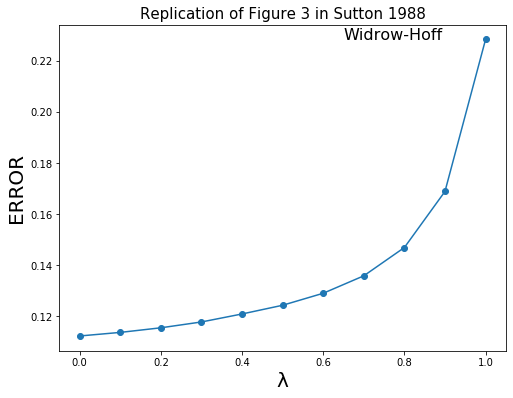

In [821]:
#Fig.3 results
result = []
for lam in range(11):
    result.append(training_rep(seq = seq_1, reward = reward_1, lam = lam/10))
lam = np.linspace(0,1,11)
plt.figure(figsize=(8,6))
plt.plot(lam,result,'-o')
plt.ylabel('ERROR',size=20)
plt.xlabel('λ',size=20)
plt.title('Replication of Figure 3 in Sutton 1988',size=15)
plt.annotate('Widrow-Hoff',(0.65, result[-1]),fontsize=16)
plt.savefig('fig3.eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


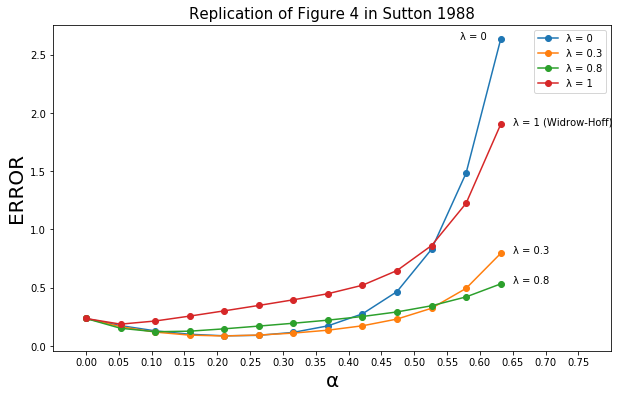

In [884]:
#Fig.4 Results
lam = [0,0.3,0.8,1]
results = {0:[],0.3:[],0.8:[],1:[]}
for l in lam:
    for alp in range(13):
        results[l].append(training_single_seq(seq = seq_1, reward = reward_1, lam = l, alpha = alp/20))
plt.figure(figsize=(10,6))
alphas = np.linspace(0,1,20)
alp = alphas[0:13]
for i in lam:
    plt.plot(alp,results[i],'-o',label='λ = {}'.format(i))
    if i == 1:
        plt.annotate('λ = {} (Widrow-Hoff)'.format(i),(0.65,results[i][-1]))
    elif i == 0:    
        plt.annotate('λ = {}'.format(i),(0.57,results[i][-1]))
    elif i == 0.3:
        plt.annotate('λ = {}'.format(i),(0.65,results[i][-1]))
    else:
        plt.annotate('λ = {}'.format(i),(0.65,results[i][-1]))
plt.xlim([-0.05,0.8])
plt.xticks(np.arange(0, 16, 1)/20)
plt.ylabel('ERROR',size=20)
plt.xlabel('α',size=20)
plt.title('Replication of Figure 4 in Sutton 1988',size=15)
plt.legend()
plt.savefig('fig4.eps', bbox_inches='tight')
plt.show()

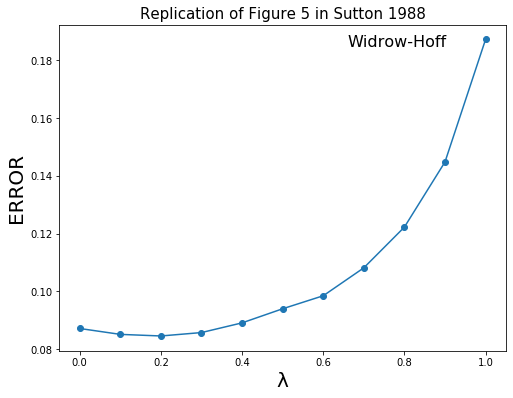

In [905]:
#Fig.5 Results
lam = np.linspace(0,1,11)
results_5 = []
for l in lam:
    result_t = []
    for alp in range(13):
        result_t.append(training_single_seq(seq = seq_1, reward = reward_1, lam = l, alpha = alp/20))
    results_5.append(min(result_t))
lam = np.linspace(0,1,11)
plt.figure(figsize=(8,6))
plt.plot(lam,results_5,'-o')
plt.ylabel('ERROR',size=20)
plt.xlabel('λ',size=20)
plt.title('Replication of Figure 5 in Sutton 1988',size=15)
plt.annotate('Widrow-Hoff',(0.66, 0.185),fontsize=16)
plt.savefig('fig5.eps', bbox_inches='tight')
plt.show()